Aditya Tushar Wadnerkar - 014428557

MNIST classifier using numpy, python and plain Neural Network

Tasks:

- Implementing Mini-Batch Gradient Descent with appropriate learning rate
- Apply and find drop-out rate at each layer
- Initialize Random Weights
- Use Image Augmentation to achieve robustness and avoid overfitting
- Use more than 2 layers and experiment with layers and neurons
- Use appropriate activation function (RelU, Softmax etc)
- Scale/Normalize the input
- Use different Learning rates
- Providing appropriate metrics, visualization, testing, training accuracy and plot results
- Display top common errors in NN learning

In [0]:
# Load Important Libraries
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
from scipy.special import expit as activation_function  # 1/(1+exp(-x)), sigmoid
from scipy.stats import truncnorm
from tqdm import tqdm
np.random.seed(10)
# Activation Function
def relu(x):
  '''
    if input is greater or equal than 0 it will return input and if input is less than 0 it will return 0
  '''
  return (x>=0) * x


Load MNIST Data and Display Plot

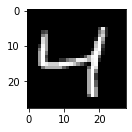

In [9]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))

Print Data

In [10]:
plt.show()
print(X_train[0].shape)

(28, 28)


--2020-03-24 07:15:46--  https://www.python-course.eu/data/mnist/mnist_train.csv
Resolving www.python-course.eu (www.python-course.eu)... 138.201.17.115, 2a01:4f8:171:286f::4
Connecting to www.python-course.eu (www.python-course.eu)|138.201.17.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [text/csv]
Saving to: ‘mnist_train.csv.4’

mnist_train.csv.4   100%[===================>] 104.50M  28.2MB/s    in 4.4s    

2020-03-24 07:15:51 (23.7 MB/s) - ‘mnist_train.csv.4’ saved [109575994/109575994]

--2020-03-24 07:15:51--  https://www.python-course.eu/data/mnist/mnist_test.csv
Resolving www.python-course.eu (www.python-course.eu)... 138.201.17.115, 2a01:4f8:171:286f::4
Connecting to www.python-course.eu (www.python-course.eu)|138.201.17.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [text/csv]
Saving to: ‘mnist_test.csv.4’

mnist_test.csv.4    100%[===================>]  17.44M  13.7MB/s    in 1.3s 

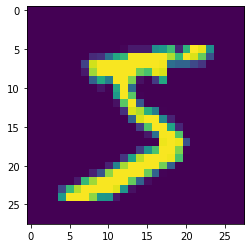

In [17]:
!wget https://www.python-course.eu/data/mnist/mnist_train.csv
!wget https://www.python-course.eu/data/mnist/mnist_test.csv
if True:
    train_data = np.loadtxt("mnist_train.csv", delimiter=",")
    test_data = np.loadtxt("mnist_test.csv", delimiter=",")
    train_imgs = np.asfarray(train_data[:, 1:]) / 255.0
    test_imgs = np.asfarray(test_data[:, 1:]) / 255.0
    train_labels = np.asfarray(train_data[:, :1])
    test_labels = np.asfarray(test_data[:, :1])
    lr = np.arange(10)
    train_labels_one_hot = (lr==train_labels).astype(np.float)
    test_labels_one_hot = (lr==test_labels).astype(np.float)
    for i, d in enumerate([train_imgs, test_imgs, train_labels, test_labels, train_labels_one_hot, test_labels_one_hot]):
        np.save('%i.array' % i, d)

(train_imgs, test_imgs, train_labels, test_labels, train_labels_one_hot, test_labels_one_hot) = [np.load('%i.array.npy' % i) for i in range(6)]

print('Loading Data....')

if False:  # Display Image
    for i in range(10):
        img = train_imgs[i].reshape((28,28))
        plt.imshow(img, cmap="Greys")
        plt.show()

class NeuralNetwork:
    def __init__(self, network_structure, learning_rate, bias=None):  
        self.structure = network_structure
        self.no_of_layers = len(self.structure)
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()

    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        self.weights_matrices = []
        for k in range(self.no_of_layers-1):
            nodes_in = self.structure[k]
            nodes_out = self.structure[k+1]
            n = (nodes_in + bias_node) * nodes_out
            X = truncnorm(-1, 1,  loc=0, scale=1)
            #X = truncnorm(-1 / np.sqrt(nodes_in), 1 / np.sqrt(nodes_in),  loc=0, scale=1)  # accuracy is worse
            wm = X.rvs(n).reshape((nodes_out, nodes_in + bias_node))
            self.weights_matrices.append(wm)

    def train(self, input_vector, target_vector): 
        input_vector = np.array(input_vector, ndmin=2).T
        res_vectors = [input_vector]
        for k in range(self.no_of_layers-1):
            in_vector = res_vectors[-1]
            if self.bias:
                in_vector = np.concatenate((in_vector, [[self.bias]]))
                res_vectors[-1] = in_vector
            x = np.dot(self.weights_matrices[k], in_vector)
            out_vector = activation_function(x)
            res_vectors.append(out_vector)    

        target_vector = np.array(target_vector, ndmin=2).T
        output_errors = target_vector - out_vector  
        for k in range(self.no_of_layers-1, 0, -1):
            out_vector = res_vectors[k]
            in_vector = res_vectors[k-1]
            if self.bias and not k==(self.no_of_layers-1):
                out_vector = out_vector[:-1,:].copy()
            tmp = output_errors * out_vector * (1.0 - out_vector)
            tmp = np.dot(tmp, in_vector.T)
            self.weights_matrices[k-1] += self.learning_rate * tmp
            output_errors = np.dot(self.weights_matrices[k-1].T, output_errors)
            if self.bias:
                output_errors = output_errors[:-1,:]

    def run(self, input_vector):
        if self.bias:
            input_vector = np.concatenate((input_vector, [self.bias]))
        in_vector = np.array(input_vector, ndmin=2).T
        for k in range(self.no_of_layers-1):
            x = np.dot(self.weights_matrices[k], in_vector)
            out_vector = activation_function(x)
            in_vector = out_vector
            if self.bias:
                in_vector = np.concatenate((in_vector, [[self.bias]]))
        return out_vector

    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs

X_train_plot_0 = train_imgs[0].reshape(-1,28,28,1)
plt.imshow(X_train_plot_0[0][:,:,0])

Define and Train ANN object for 5 epochs

In [18]:
ANN = NeuralNetwork(network_structure=[784, 300, 74, 10], learning_rate=0.25, bias=None)
for epoch in tqdm(range(5)):
    for i in range(len(train_imgs)):
        if i % 1000 == 0:
            print('epoch:', epoch, 'img number:', i, '/', len(train_imgs))
        ANN.train(train_imgs[i], train_labels_one_hot[i])

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 0 img number: 0 / 60000
epoch: 0 img number: 1000 / 60000
epoch: 0 img number: 2000 / 60000
epoch: 0 img number: 3000 / 60000
epoch: 0 img number: 4000 / 60000
epoch: 0 img number: 5000 / 60000
epoch: 0 img number: 6000 / 60000
epoch: 0 img number: 7000 / 60000
epoch: 0 img number: 8000 / 60000
epoch: 0 img number: 9000 / 60000
epoch: 0 img number: 10000 / 60000
epoch: 0 img number: 11000 / 60000
epoch: 0 img number: 12000 / 60000
epoch: 0 img number: 13000 / 60000
epoch: 0 img number: 14000 / 60000
epoch: 0 img number: 15000 / 60000
epoch: 0 img number: 16000 / 60000
epoch: 0 img number: 17000 / 60000
epoch: 0 img number: 18000 / 60000
epoch: 0 img number: 19000 / 60000
epoch: 0 img number: 20000 / 60000
epoch: 0 img number: 21000 / 60000
epoch: 0 img number: 22000 / 60000
epoch: 0 img number: 23000 / 60000
epoch: 0 img number: 24000 / 60000
epoch: 0 img number: 25000 / 60000
epoch: 0 img number: 26000 / 60000
epoch: 0 img number: 27000 / 60000
epoch: 0 img number: 28000 / 6000

 20%|██        | 1/5 [01:39<06:36, 99.24s/it]

epoch: 1 img number: 0 / 60000
epoch: 1 img number: 1000 / 60000
epoch: 1 img number: 2000 / 60000
epoch: 1 img number: 3000 / 60000
epoch: 1 img number: 4000 / 60000
epoch: 1 img number: 5000 / 60000
epoch: 1 img number: 6000 / 60000
epoch: 1 img number: 7000 / 60000
epoch: 1 img number: 8000 / 60000
epoch: 1 img number: 9000 / 60000
epoch: 1 img number: 10000 / 60000
epoch: 1 img number: 11000 / 60000
epoch: 1 img number: 12000 / 60000
epoch: 1 img number: 13000 / 60000
epoch: 1 img number: 14000 / 60000
epoch: 1 img number: 15000 / 60000
epoch: 1 img number: 16000 / 60000
epoch: 1 img number: 17000 / 60000
epoch: 1 img number: 18000 / 60000
epoch: 1 img number: 19000 / 60000
epoch: 1 img number: 20000 / 60000
epoch: 1 img number: 21000 / 60000
epoch: 1 img number: 22000 / 60000
epoch: 1 img number: 23000 / 60000
epoch: 1 img number: 24000 / 60000
epoch: 1 img number: 25000 / 60000
epoch: 1 img number: 26000 / 60000
epoch: 1 img number: 27000 / 60000
epoch: 1 img number: 28000 / 6000

 40%|████      | 2/5 [03:19<04:58, 99.47s/it]

epoch: 2 img number: 0 / 60000
epoch: 2 img number: 1000 / 60000
epoch: 2 img number: 2000 / 60000
epoch: 2 img number: 3000 / 60000
epoch: 2 img number: 4000 / 60000
epoch: 2 img number: 5000 / 60000
epoch: 2 img number: 6000 / 60000
epoch: 2 img number: 7000 / 60000
epoch: 2 img number: 8000 / 60000
epoch: 2 img number: 9000 / 60000
epoch: 2 img number: 10000 / 60000
epoch: 2 img number: 11000 / 60000
epoch: 2 img number: 12000 / 60000
epoch: 2 img number: 13000 / 60000
epoch: 2 img number: 14000 / 60000
epoch: 2 img number: 15000 / 60000
epoch: 2 img number: 16000 / 60000
epoch: 2 img number: 17000 / 60000
epoch: 2 img number: 18000 / 60000
epoch: 2 img number: 19000 / 60000
epoch: 2 img number: 20000 / 60000
epoch: 2 img number: 21000 / 60000
epoch: 2 img number: 22000 / 60000
epoch: 2 img number: 23000 / 60000
epoch: 2 img number: 24000 / 60000
epoch: 2 img number: 25000 / 60000
epoch: 2 img number: 26000 / 60000
epoch: 2 img number: 27000 / 60000
epoch: 2 img number: 28000 / 6000

 60%|██████    | 3/5 [05:00<03:20, 100.09s/it]

epoch: 3 img number: 0 / 60000
epoch: 3 img number: 1000 / 60000
epoch: 3 img number: 2000 / 60000
epoch: 3 img number: 3000 / 60000
epoch: 3 img number: 4000 / 60000
epoch: 3 img number: 5000 / 60000
epoch: 3 img number: 6000 / 60000
epoch: 3 img number: 7000 / 60000
epoch: 3 img number: 8000 / 60000
epoch: 3 img number: 9000 / 60000
epoch: 3 img number: 10000 / 60000
epoch: 3 img number: 11000 / 60000
epoch: 3 img number: 12000 / 60000
epoch: 3 img number: 13000 / 60000
epoch: 3 img number: 14000 / 60000
epoch: 3 img number: 15000 / 60000
epoch: 3 img number: 16000 / 60000
epoch: 3 img number: 17000 / 60000
epoch: 3 img number: 18000 / 60000
epoch: 3 img number: 19000 / 60000
epoch: 3 img number: 20000 / 60000
epoch: 3 img number: 21000 / 60000
epoch: 3 img number: 22000 / 60000
epoch: 3 img number: 23000 / 60000
epoch: 3 img number: 24000 / 60000
epoch: 3 img number: 25000 / 60000
epoch: 3 img number: 26000 / 60000
epoch: 3 img number: 27000 / 60000
epoch: 3 img number: 28000 / 6000

 80%|████████  | 4/5 [06:42<01:40, 100.60s/it]

epoch: 4 img number: 0 / 60000
epoch: 4 img number: 1000 / 60000
epoch: 4 img number: 2000 / 60000
epoch: 4 img number: 3000 / 60000
epoch: 4 img number: 4000 / 60000
epoch: 4 img number: 5000 / 60000
epoch: 4 img number: 6000 / 60000
epoch: 4 img number: 7000 / 60000
epoch: 4 img number: 8000 / 60000
epoch: 4 img number: 9000 / 60000
epoch: 4 img number: 10000 / 60000
epoch: 4 img number: 11000 / 60000
epoch: 4 img number: 12000 / 60000
epoch: 4 img number: 13000 / 60000
epoch: 4 img number: 14000 / 60000
epoch: 4 img number: 15000 / 60000
epoch: 4 img number: 16000 / 60000
epoch: 4 img number: 17000 / 60000
epoch: 4 img number: 18000 / 60000
epoch: 4 img number: 19000 / 60000
epoch: 4 img number: 20000 / 60000
epoch: 4 img number: 21000 / 60000
epoch: 4 img number: 22000 / 60000
epoch: 4 img number: 23000 / 60000
epoch: 4 img number: 24000 / 60000
epoch: 4 img number: 25000 / 60000
epoch: 4 img number: 26000 / 60000
epoch: 4 img number: 27000 / 60000
epoch: 4 img number: 28000 / 6000

100%|██████████| 5/5 [08:23<00:00, 100.79s/it]


In [19]:
corrects, wrongs = ANN.evaluate(test_imgs, test_labels)
print("accruracy: test", corrects / (corrects + wrongs))

accruracy: test 0.863
